In [13]:
import tensorflow as tf; tf.reset_default_graph()

init_x = tf.keras.initializers.constant(0.2)
init_y = tf.keras.initializers.constant(0.3)
x = tf.get_variable('x', (), tf.float32, init_x) # x:0
y = tf.get_variable('y', (), tf.float32, init_y) # y:0
f = x**2 + x*y + y**2
f_x, f_y = tf.gradients(f, [x, y])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run([f, f_x, f_y]))

[0.19000001, 0.70000005, 0.8]


In [11]:
x = 0.2
y = 0.3
f = x**2 + x*y + y**2
f_x = 2*x + y 
f_y = x + 2*y 
print(f, f_x, f_y)

0.19 0.7 0.8


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
def give_me_df(ticker): 
    import yfinance as yf
    import pandas as pd
    stock = yf.Ticker(ticker) 
    df = stock.history(period='max')
    df[ticker] = df.Close.pct_change() 
    return df[[ticker]].iloc[1:]

def join_dfs(*dfs):
    for idx, df_ in enumerate(dfs):
        if idx == 0:
            df = df_
        else:
            df = df.join(df_, how='inner')
    return df

In [16]:
df_1 = give_me_df('SPY')
df_2 = give_me_df('AAPL')
df_3 = give_me_df('FB')
dh = join_dfs(df_1, df_2, df_3)

In [17]:
dh.shape

(2125, 3)

In [20]:
x_data = dh.iloc[-200:-100,:-1].values
y_data = dh.iloc[-200:-100,-1].values.reshape((-1,1))

In [21]:
print(x_data.shape, y_data.shape)

(100, 2) (100, 1)


In [49]:
lr = 1e-2
epoch = int(1e4)

import tensorflow as tf; tf.reset_default_graph()

x = tf.placeholder(tf.float32, (100, 2)) # (100, 2)
y = tf.placeholder(tf.float32, (100, 1)) # (100, 1)

init_al = tf.keras.initializers.constant(0.0)
init_bt = tf.keras.initializers.constant(1.0)
al = tf.get_variable('alpha', (), tf.float32, init_al) # x:0
bt = tf.get_variable('beta', (2, 1), tf.float32, init_bt) # (2, 1)
y_pred = al + x @ bt # () + (100, 2) @ (2, 1) -> () + (100, 1) -> (100, 1)
loss = tf.nn.l2_loss(y-y_pred) # ()
grad_al, grad_bt = tf.gradients(loss, [al, bt])
train_al = tf.assign(al, al - lr * grad_al)
train_bt = tf.assign(bt, bt - lr * grad_bt)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    loss_trace = []
    for i in range(epoch):
        feed_dict = {x : x_data, y : y_data}
        loss_run, _, _ = sess.run([loss, train_al, train_bt], feed_dict=feed_dict)
        loss_trace.append(loss_run)

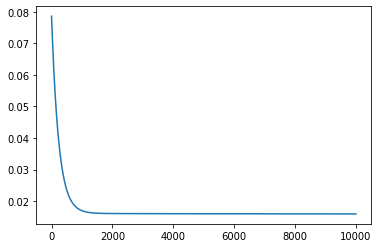

In [50]:
plt.plot(loss_trace)
plt.show()